In [ ]:
### 해당 코드는 백테스팅을 하는 코드입니다.

In [1252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1253]:
# 포트폴리오 비중 데이터프레임을 불러옵니다.
last_weight_pd=pd.read_excel('last_portfolio_weight_risk.xlsx',index_col=0)


In [1254]:
last_weight_pd

,dollar,HYG,SHYG,LQD,VCLT,VCIT,VCSH,GSY,LTPZ,VTIP,GOVT,TLT,IEF,SHY,SHV,gold
2014-01-01,2.286085e-01,0.033534,0.102082,0.006749,0.004170,0.007666,0.023005,0.094026,0.022009,0.144866,0.004459,0.001218,0.002738,0.032250,0.195818,0.096801
2014-02-01,2.289731e-01,0.033473,0.101905,0.006803,0.004196,0.007716,0.023054,0.093610,0.021945,0.144752,0.004452,0.001219,0.002727,0.031943,0.196485,0.096748
2014-03-01,2.297806e-01,0.033313,0.101525,0.006774,0.004174,0.007698,0.023026,0.093168,0.021912,0.144873,0.004502,0.001231,0.002756,0.032144,0.196474,0.096648
2014-04-01,2.321367e-01,0.032913,0.100431,0.006688,0.004143,0.007594,0.022816,0.092103,0.022036,0.145453,0.004513,0.001236,0.002752,0.031940,0.197790,0.095456
2014-05-01,2.363313e-01,0.029590,0.090380,0.006017,0.003727,0.006830,0.020516,0.082879,0.023050,0.152532,0.004740,0.001299,0.002888,0.033475,0.207596,0.098150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,-4.293690e-15,0.032037,0.066636,0.006748,0.004645,0.009566,0.017974,0.059740,0.035322,0.233734,0.010236,0.003284,0.007268,0.049876,0.331035,0.131899
2022-09-01,-1.941090e-15,0.032179,0.066994,0.006726,0.004643,0.009518,0.017960,0.060326,0.035471,0.233785,0.010160,0.003274,0.007216,0.049153,0.330625,0.131970
2022-10-01,-1.737507e-15,0.032559,0.067638,0.006729,0.004651,0.009493,0.017999,0.061324,0.034927,0.228043,0.010130,0.003284,0.007179,0.048541,0.332231,0.135272
2022-11-01,-1.531039e-15,0.032624,0.067822,0.006701,0.004634,0.009431,0.017943,0.061737,0.035362,0.229400,0.010036,0.003265,0.007107,0.047718,0.330376,0.135843


In [1255]:
#달러의 경우 비중을 따로 저장해둡니다. 매트릭스 형태 곱에서 제외해서 나중에 더해줄 예정입니다. 이유는 모든 자산이 달러로 사야하기 때문입니다.
dollar_weight=last_weight_pd.dollar.asfreq('B').ffill()

In [1256]:
# ETF 변화율 데이터를 가져옵니다.
ETF_pd=pd.read_excel('all_ETF_data.xlsx',index_col=0)


In [1257]:
ETF_pd

,gold,GOVT,GSY,HSV,HYG,IEF,LQD,LTPZ,SHV,SHY,SHYG,TIPS,TLT,VCIT,VCLT,VCSH,VTIP
Date,,,,,,,,,,,,,,,,,
2010-12-06,0.006838,0.004114,0.000000,0.000084,-0.000581,0.006257,0.006979,0.009781,0.000091,0.001141,0.000835,0.005365,0.010866,0.003125,0.009454,0.002317,0.002403
2010-12-07,-0.015220,-0.010471,-0.000804,0.000000,0.005170,-0.016580,-0.009302,-0.015784,0.000000,-0.002239,0.001848,-0.011376,-0.027978,-0.008478,-0.014625,-0.004197,-0.001698
2010-12-08,-0.014300,-0.003451,0.000000,0.000000,-0.003230,-0.008535,-0.006444,-0.017311,0.000000,-0.001142,-0.000897,-0.007735,-0.003636,-0.008613,-0.001979,-0.002358,-0.003400
2010-12-09,0.003676,-0.000115,0.000000,0.000000,-0.002121,0.002125,0.002410,-0.001487,0.000000,-0.000286,0.000730,-0.001792,0.006994,0.001333,0.003940,-0.001421,-0.000202
2010-12-10,-0.000707,-0.002193,0.000604,0.000000,0.000448,-0.008485,-0.004622,-0.005572,-0.000181,-0.000082,0.000125,-0.002291,-0.003775,-0.004435,-0.002287,-0.002069,-0.000903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09,0.003280,0.002483,0.001010,0.000078,0.003575,0.002541,0.003959,0.008526,0.000091,0.001083,0.004319,0.002728,0.005389,0.003787,0.004409,0.001189,0.000926
2023-01-10,0.002789,-0.004573,0.000000,0.000000,-0.001187,-0.006286,-0.003394,-0.013331,-0.000091,-0.000597,-0.001011,-0.004209,-0.015983,-0.002012,-0.005769,-0.000528,-0.000617
2023-01-11,-0.000714,0.004786,0.000202,0.000156,0.006604,0.006428,0.008559,0.012193,0.000273,0.000635,0.003135,0.004828,0.015945,0.005671,0.013496,0.001980,0.000823


In [1258]:
#기타 다른 데이터를 가져옵니다.

other_data=pd.read_excel('Data-FICC_Modeling.xlsx',index_col=0,sheet_name='ETC').iloc[1:,4:]


#### 기준금리와 환율은 따로 생각해주기위해 데이터프레임형태로 각각 저장해둡니다.

In [1259]:
risk_free=other_data.loc[last_weight_pd.index,'한국 기준금리']+0.001 #기준금리 +가산금리
risk_free=(risk_free*5/(100*252)).loc[last_weight_pd.index].asfreq('B').fillna(0)
risk_free=risk_free.iloc[1:-1] # 필요없는 날짜 제거

exchange_pd=other_data.loc[:,'원달러 환율']
exchange_pd=exchange_pd.asfreq('B').pct_change().dropna() #변화율로 변경

#### 비중 값을 비지니스 데이로 바꿔준 뒤 필요없는 처음날짜와 끝날짜를 제거해줍니다.

In [1260]:
last_weight_pd=last_weight_pd.asfreq('D').asfreq('B').ffill().iloc[1:-1]


In [1261]:
last_weight_pd

,dollar,HYG,SHYG,LQD,VCLT,VCIT,VCSH,GSY,LTPZ,VTIP,GOVT,TLT,IEF,SHY,SHV,gold
2014-01-02,2.286085e-01,0.033534,0.102082,0.006749,0.004170,0.007666,0.023005,0.094026,0.022009,0.144866,0.004459,0.001218,0.002738,0.032250,0.195818,0.096801
2014-01-03,2.286085e-01,0.033534,0.102082,0.006749,0.004170,0.007666,0.023005,0.094026,0.022009,0.144866,0.004459,0.001218,0.002738,0.032250,0.195818,0.096801
2014-01-06,2.286085e-01,0.033534,0.102082,0.006749,0.004170,0.007666,0.023005,0.094026,0.022009,0.144866,0.004459,0.001218,0.002738,0.032250,0.195818,0.096801
2014-01-07,2.286085e-01,0.033534,0.102082,0.006749,0.004170,0.007666,0.023005,0.094026,0.022009,0.144866,0.004459,0.001218,0.002738,0.032250,0.195818,0.096801
2014-01-08,2.286085e-01,0.033534,0.102082,0.006749,0.004170,0.007666,0.023005,0.094026,0.022009,0.144866,0.004459,0.001218,0.002738,0.032250,0.195818,0.096801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,-1.531039e-15,0.032624,0.067822,0.006701,0.004634,0.009431,0.017943,0.061737,0.035362,0.229400,0.010036,0.003265,0.007107,0.047718,0.330376,0.135843
2022-11-25,-1.531039e-15,0.032624,0.067822,0.006701,0.004634,0.009431,0.017943,0.061737,0.035362,0.229400,0.010036,0.003265,0.007107,0.047718,0.330376,0.135843
2022-11-28,-1.531039e-15,0.032624,0.067822,0.006701,0.004634,0.009431,0.017943,0.061737,0.035362,0.229400,0.010036,0.003265,0.007107,0.047718,0.330376,0.135843
2022-11-29,-1.531039e-15,0.032624,0.067822,0.006701,0.004634,0.009431,0.017943,0.061737,0.035362,0.229400,0.010036,0.003265,0.007107,0.047718,0.330376,0.135843


####  달러 칼럼을 제거해줍니다. 나중에 따로 더해줄 예정입니다.

In [1262]:

tmt_col=list(last_weight_pd.columns)
tmt_col.remove('dollar')


In [1263]:
adjust_ETF_pd=ETF_pd.loc[:,tmt_col].loc['2014-01':'2022-11'].iloc[1:].asfreq('B')

#### 데이터의 행개수가 같은지, 혹은 날짜가 전부 같은지 확인합니다.

In [1264]:
np.shape(adjust_ETF_pd),np.shape(last_weight_pd)

((2325, 15), (2325, 16))

In [1265]:
#달러 weight 제거
adjust_last_weight_pd=last_weight_pd.iloc[:,1:]

In [1266]:
adjust_last_weight_pd

,HYG,SHYG,LQD,VCLT,VCIT,VCSH,GSY,LTPZ,VTIP,GOVT,TLT,IEF,SHY,SHV,gold
2014-01-02,0.033534,0.102082,0.006749,0.004170,0.007666,0.023005,0.094026,0.022009,0.144866,0.004459,0.001218,0.002738,0.032250,0.195818,0.096801
2014-01-03,0.033534,0.102082,0.006749,0.004170,0.007666,0.023005,0.094026,0.022009,0.144866,0.004459,0.001218,0.002738,0.032250,0.195818,0.096801
2014-01-06,0.033534,0.102082,0.006749,0.004170,0.007666,0.023005,0.094026,0.022009,0.144866,0.004459,0.001218,0.002738,0.032250,0.195818,0.096801
2014-01-07,0.033534,0.102082,0.006749,0.004170,0.007666,0.023005,0.094026,0.022009,0.144866,0.004459,0.001218,0.002738,0.032250,0.195818,0.096801
2014-01-08,0.033534,0.102082,0.006749,0.004170,0.007666,0.023005,0.094026,0.022009,0.144866,0.004459,0.001218,0.002738,0.032250,0.195818,0.096801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,0.032624,0.067822,0.006701,0.004634,0.009431,0.017943,0.061737,0.035362,0.229400,0.010036,0.003265,0.007107,0.047718,0.330376,0.135843
2022-11-25,0.032624,0.067822,0.006701,0.004634,0.009431,0.017943,0.061737,0.035362,0.229400,0.010036,0.003265,0.007107,0.047718,0.330376,0.135843
2022-11-28,0.032624,0.067822,0.006701,0.004634,0.009431,0.017943,0.061737,0.035362,0.229400,0.010036,0.003265,0.007107,0.047718,0.330376,0.135843
2022-11-29,0.032624,0.067822,0.006701,0.004634,0.009431,0.017943,0.061737,0.035362,0.229400,0.010036,0.003265,0.007107,0.047718,0.330376,0.135843


In [1267]:
adjust_ETF_pd

,HYG,SHYG,LQD,VCLT,VCIT,VCSH,GSY,LTPZ,VTIP,GOVT,TLT,IEF,SHY,SHV,gold
Date,,,,,,,,,,,,,,,
2014-01-02,0.001722,0.000038,0.001944,0.002651,0.002056,-0.001003,0.000200,0.007694,0.000515,0.001059,0.003886,0.003931,0.000120,-0.000182,0.015507
2014-01-03,-0.000322,0.000435,0.001485,0.003965,0.000603,0.000377,-0.000200,0.003298,-0.000594,-0.000635,-0.001998,-0.000602,-0.000319,0.000182,0.010101
2014-01-06,0.002149,0.001005,0.002182,0.000120,0.003619,0.000878,0.000598,0.003804,0.001129,0.001482,0.006381,0.002812,0.000160,-0.000092,0.000881
2014-01-07,0.000000,0.000990,-0.000783,0.003470,0.001081,0.000375,0.000002,0.002067,0.000850,0.000845,0.002860,0.001602,0.000120,0.000000,-0.004830
2014-01-08,-0.000644,0.000243,-0.004271,-0.004413,-0.004440,-0.001002,-0.000021,0.003611,-0.001285,-0.002534,-0.004091,-0.004900,-0.000877,0.000046,-0.004943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,0.000000,0.000177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.003178
2022-11-25,-0.001995,0.000983,0.001022,0.000894,0.001405,0.000133,0.000609,0.000248,-0.000103,-0.000194,-0.002808,-0.000309,0.000377,0.000090,-0.000177
2022-11-28,-0.010533,-0.003790,-0.007238,-0.009195,-0.006758,-0.000531,0.000201,-0.007804,-0.000309,0.000775,0.002916,0.000412,0.000490,0.000091,-0.007733


#### 모델의 일일 성과 데이터프레임을 만들어줍니다.

In [1344]:
simulation_pd=(adjust_ETF_pd*adjust_last_weight_pd).sum(axis=1)
print(simulation_pd)
# 달러 환전 고려

simulation_pd=simulation_pd #+ (1+dollar_weight)*exchange_pd.asfreq('B').loc[:"2022-11"]
# 무위험 이자율(금리) 제거
simulation_pd=simulation_pd-risk_free

Date
2014-01-02    0.001831
2014-01-03    0.001038
2014-01-06    0.000636
2014-01-07   -0.000156
2014-01-08   -0.000737
                ...   
2022-11-24    0.000444
2022-11-25    0.000061
2022-11-28   -0.002076
2022-11-29   -0.000091
2022-11-30    0.005413
Freq: B, Length: 2325, dtype: float64


In [1345]:
model_backtest_pd=((simulation_pd+1).cumprod()-1)

In [1346]:
# NA 값 제거해줍니다.

model_backtest_pd=model_backtest_pd.dropna()

<AxesSubplot:xlabel='Date'>

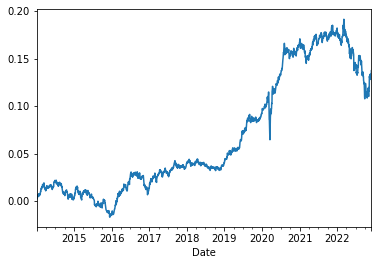

In [1347]:
model_backtest_pd.plot()

In [1348]:
#원달러 환율 날짜 맞추는 과정
exchange_rate=pd.DataFrame(exchange_pd.asfreq('B').loc[:"2022-11"].reset_index(drop=True).T)
exchange_rate.index=adjust_ETF_pd.index
exchange_rate

,원달러 환율
Date,
2014-01-02,-0.005304
2014-01-03,0.004742
2014-01-06,0.009657
2014-01-07,0.002778
2014-01-08,-0.003594
...,...
2022-11-24,-0.017579
2022-11-25,-0.002973
2022-11-28,0.012276


### 다음은 벤치마크인 동일비중 투자 방식을 구현한 코드입니다.

In [1349]:
benchmark=(pd.DataFrame(np.array(adjust_ETF_pd.mean(axis=1))).T )
           
benchmark= (benchmark ).T#+ np.array(exchange_rate).T).T


In [1350]:
benchmark

,0
0,0.002676
1,0.001052
2,0.001807
3,0.000577
4,-0.001968
...,...
2320,0.000230
2321,0.000012
2322,-0.003267
2323,-0.002812


In [1351]:
benchmark.index=adjust_ETF_pd.index
benchmark.columns=['benchmark']

#### 무위험 이자율을 뺴줍니다.

In [1352]:
benchmark_pd=np.array(benchmark).T- np.array(risk_free).T


#### 벤치마크의 누적수익률을 구합니다.

In [1353]:
benchmark_backtest_pd=pd.DataFrame((benchmark_pd+1).T).cumprod()-1

In [1354]:
benchmark_simulation=pd.DataFrame(benchmark_backtest_pd)
benchmark_simulation.columns=['benchmark']
benchmark_simulation.index=model_backtest_pd.index

In [1355]:
benchmark_simulation

,benchmark
Date,
2014-01-02,0.002676
2014-01-03,0.003730
2014-01-06,0.005544
2014-01-07,0.006124
2014-01-08,0.004144
...,...
2022-11-24,0.212894
2022-11-25,0.212908
2022-11-28,0.208946


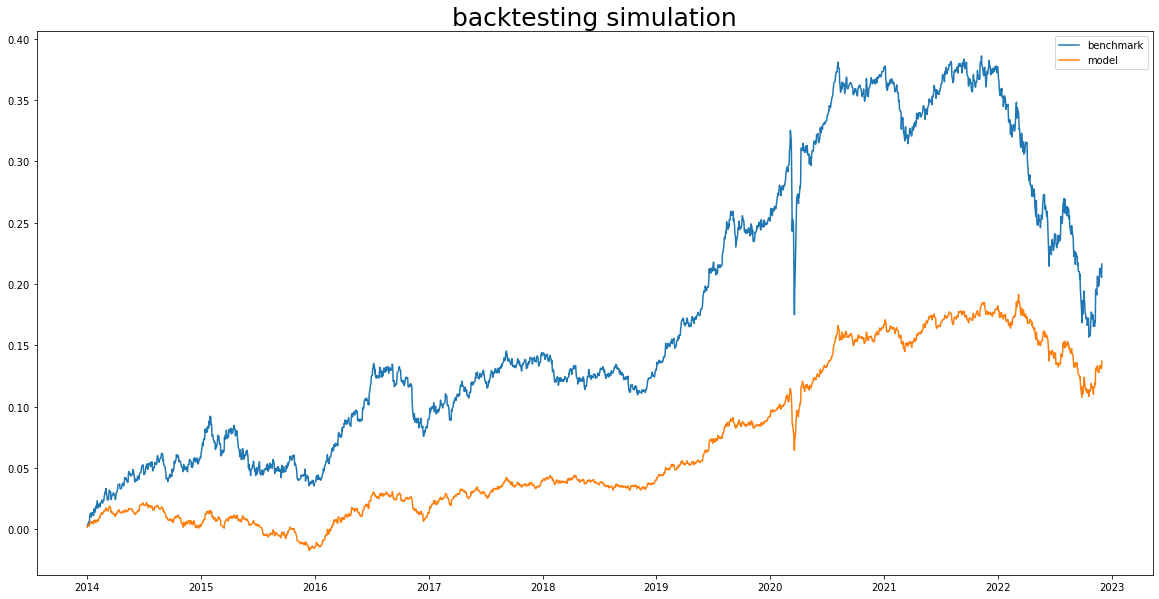

In [1356]:
plt.figure(figsize=(20,10))
plt.plot(benchmark_simulation,label='benchmark')
plt.plot(model_backtest_pd,label='model')
plt.title('backtesting simulation',fontsize=25)
plt.legend()

In [1357]:
benchmark_simulation.mean()/benchmark_simulation.std()

benchmark    1.547373
dtype: float64

In [1358]:
model_backtest_pd.mean()/model_backtest_pd.std()

1.0837120337434913

In [1359]:
benchmark_simulation.std()

benchmark    0.113728
dtype: float64

In [1360]:
model_backtest_pd.std()

0.06248538444395137

In [1361]:
import numpy as np
def get_mdd(x):
    """
    MDD(Maximum Draw-Down)
    :return: (peak_upper, peak_lower, mdd rate)
    """
    arr_v = np.array(x)
    peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
    peak_upper = np.argmax(arr_v[:peak_lower])
    return peak_upper, peak_lower, (arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper]

In [1362]:
get_mdd(model_backtest_pd)

(2133, 2278, -0.43778455681442724)

In [1363]:
get_mdd(benchmark_simulation.dropna())

(2046, 2293, array([-0.59360527]))

In [1330]:
 benchmark_simulation

,benchmark
2014-01-02,-0.002628
2014-01-03,0.003150
2014-01-06,0.014650
2014-01-07,0.018054
2014-01-08,0.012392
...,...
2022-11-24,0.532987
2022-11-25,0.528446
2022-11-28,0.542217
2022-11-29,0.522132
